# Advanced Graphing with Seaborn
# Seaborn: Distributions
## Introduction
We will use Seaborn to graph multiple statistical distributions, including box plots and violin plots.

Seaborn is optimized to work with large datasets -- from its ability to natively interact with Pandas DataFrames, to automatically calculating and plotting aggregates. One of the most powerful aspects of Seaborn is its ability to visualize and compare distributions. Distributions provide us with more information about our data -- how spread out it is, its range, etc.

## Bar Charts Hide Information
Before we look into new charts, we need to understand why we'd want to use them. We know that in Seaborn we can quickly aggregate data to plot bar charts using the mean.

Below is a bar chart that uses three different randomly generated sets of data:
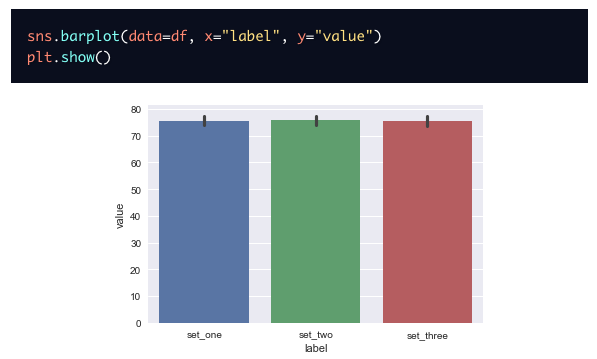
As we can see the three datasets look identical and seem to have same mean and similar confidence intervals.

We can get alot of information from the bar charts, but we can't get everything like the minimum and maximum values of these datasets or how spread out the data is. 

#### Example
You work as a scientist and are measuring the amounts of plastic in different bodies of water. You're interested in comparing data collected from different locations. 

Below we have imported four different datasets using NumPy and have combined them into one DataFrame, `df`.

Plot the graph for the datasets in one plot

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Take in the data from the CSVs as NumPy arrays:
set_one = np.genfromtxt('dataset1.csv', delimiter=',')
set_two = np.genfromtxt('dataset2.csv', delimiter=',')
set_three = np.genfromtxt('dataset3.csv', delimiter=',')
set_four = np.genfromtxt('dataset4.csv', delimiter=',')

# Creating a Pandas DataFrame:
n=500
df = pd.DataFrame({
    "label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n + ["set_four"] * n,
    "value": np.concatenate([set_one, set_two, set_three, set_four])
}
)
print(df.head())

     label      value
0  set_one  94.605631
1  set_one  54.772845
2  set_one  73.637338
3  set_one  55.015799
4  set_one  83.609378


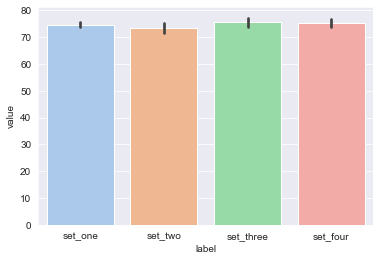

In [8]:
# Setting styldes:
sns.set_style('darkgrid')
sns.set_palette('pastel')

sns.barplot(data=df, x="label", y="value")
plt.show()

## KDE Plots, Part 1